# gene
here is some examples of trackc's gene track

## convert GTF to BED12
Download the GTF version of the genome corresponding to the multi-group data. And use the **gtf2bed4trackc** tool, which installed with trackc convert to bed12

In [4]:
!wget https://ftp.ensembl.org/pub/release-105/gtf/homo_sapiens/Homo_sapiens.GRCh38.105.chr.gtf.gz
!gunzip Homo_sapiens.GRCh38.105.chr.gtf.gz
!gtf2bed4trackc -g Homo_sapiens.GRCh38.105.chr.gtf -o Homo_sapiens.GRCh38.105.chr.bed13 --biotype2bed13

--2023-05-27 13:24:18--  https://ftp.ensembl.org/pub/release-105/gtf/homo_sapiens/Homo_sapiens.GRCh38.105.chr.gtf.gz
正在解析主机 ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.139
正在连接 ftp.ensembl.org (ftp.ensembl.org)|193.62.193.139|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：50823019 (48M) [application/x-gzip]
正在保存至: “Homo_sapiens.GRCh38.105.chr.gtf.gz”

Homo_sapiens.GRCh38 100%[===================>]  48.47M   235KB/s  用时 5m 45s    

2023-05-27 13:30:04 (144 KB/s) - 已保存 “Homo_sapiens.GRCh38.105.chr.gtf.gz” [50823019/50823019])

gtf2bed finished


In [5]:
import sys
sys.path.append('/Users/yuanzan/Documents/github/seqyuan/trackc/src')
import trackc as tc

In [6]:
import pandas as pd
gene_bed12_file = './Homo_sapiens.GRCh38.105.chr.bed13'
gene_bed12 = pd.read_table(gene_bed12_file, header=None)
display(gene_bed12[12].unique())
# only show the protein_coding type gene
gene_bed12 = gene_bed12[gene_bed12[12]=="protein_coding"]

array(['protein_coding', 'lncRNA', 'unprocessed_pseudogene',
       'processed_pseudogene', 'transcribed_processed_pseudogene',
       'transcribed_unitary_pseudogene',
       'transcribed_unprocessed_pseudogene', 'TEC', 'unitary_pseudogene',
       'snRNA', 'miRNA', 'misc_RNA', 'snoRNA', 'scaRNA',
       'rRNA_pseudogene', 'pseudogene', 'rRNA', 'polymorphic_pseudogene',
       'IG_V_pseudogene', 'scRNA', 'IG_V_gene', 'IG_C_gene', 'IG_J_gene',
       'sRNA', 'ribozyme', 'translated_processed_pseudogene', 'vault_RNA',
       'TR_V_gene', 'TR_C_gene', 'TR_J_gene', 'TR_V_pseudogene',
       'TR_D_gene', 'translated_unprocessed_pseudogene',
       'IG_C_pseudogene', 'TR_J_pseudogene', 'IG_J_pseudogene',
       'IG_D_gene', 'IG_pseudogene', 'Mt_tRNA', 'Mt_rRNA'], dtype=object)

## trackc.pl.scale_track
Trackc supports **trackc.pl.scale_track** methods for gene track visualization

### show_label 
Default value is True, means show all the gene names of the regions

* False, do not show all the gene names of the regions
* one single gene string, example "KMT2C", means only show `KMT2C` gene name, if the gene position is in the regions
* gene list, example ["KMT2C", "ACTR3B"], means show gene names in the given gene list

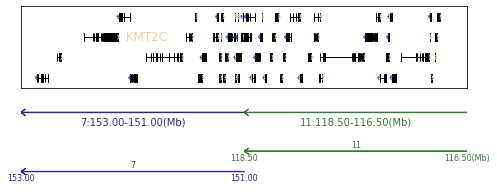

In [7]:
import trackc as tc

regions = ['7:153000000-151000000', '11:118500000-116500000']

ten = tc.tenon(width=8, height=1.5)
ten.add(pos='bottom', height=1)
ten.add(pos='bottom', height=0.4, hspace=0.1)
ten.add(pos='bottom', height=0.6, hspace=0.1)

tc.pl.gene_track(ax=ten.axs(0), bed12=gene_bed12, regions=regions, line=4, show_label=['KMT2C'], ax_on=True, gene_fontszie=12)
tc.pl.multi_scale_track(ten.axs(1), regions=regions, scale_adjust='Mb', intervals=1, tick_rotation=0, tick_fontsize=10)
tc.pl.multi_scale_track(ten.axs(2), regions=regions, scale_adjust='Mb', intervals=2, tick_rotation=0)

#tc.savefig('gene_track.pdf')

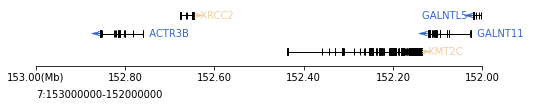

In [16]:

ten = tc.tenon(width=8, height=1)
ten.add(pos='bottom', height=1)

tc.pl.gene_track(ax=ten.axs(0), bed12=gene_bed12, regions='7:153000000-152000000', line=3, gene_fontszie=10)
tc.pl.scale_track(ax=ten.axs(0), region='7:153000000-152000000', scale_adjust='Mb', tick_pos='bottom', ratio2ax=0.6)
